In [97]:
%matplotlib inline
from __future__ import division
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import scipy.signal

In [98]:
fs = 32
g = 9.81

def load_data(base_path):

    activities = [item for item in os.listdir(base_path) if os.path.isdir(base_path+item) and ('MODEL' not in item)]
    raw = {}
    
    for activity in activities:
        raw[activity] = []
        for item in os.listdir(base_path+activity):
            data = raw_to_mps(np.loadtxt(base_path+activity+'/'+item))
            sex, iden = re.findall('-([mf])([0-9]+)\.txt',item)[0]
            raw[activity] += [{'data':data,'sex':sex,'iden':sex+iden}]
            
    return raw

def raw_to_mps(data):
    return -1.5*g+data*3*g/63

In [99]:
def plot_accel(trial_data):
    length = trial_data.shape[0]
    t = np.arange(length)/fs
    plt.figure()
    plt.plot(t,trial_data)
    plt.legend(['x','y','z'])
    plt.axis((0,np.max(t),-1.5*g,1.5*g))
    plt.xlabel('Time (s)')
    plt.ylabel('Acceleration (m/s^2)')

def plot_accel_fft(trial_data):
    trial_data_fft = np.abs(np.fft.rfft(trial_data,axis=0))
    w = np.fft.rfftfreq(trial_data.shape[0],1/fs)
    plt.figure()
    plt.plot(w,trial_data_fft)
    plt.legend(['x','y','z'])
    plt.axis((0,np.max(w),0,np.max(trial_data_fft[1:,0])))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Intensity (a.u.)')

In [104]:
def med1d(data,kernel_sz=3):
    return np.apply_along_axis(scipy.signal.medfilt,0,data,kernel_sz)

def conv1d(data,kernel_sz=11,sig=3):
    filt = np.exp(-(np.arange(-kernel_sz,kernel_sz+1)/sig)**2)
    return np.apply_along_axis(np.convolve,0,data,filt/np.sum(filt),'same')

In [101]:
base_path = '/Users/elio/Desktop/CDIPS/HMP_Dataset/'
raw = load_data(base_path)

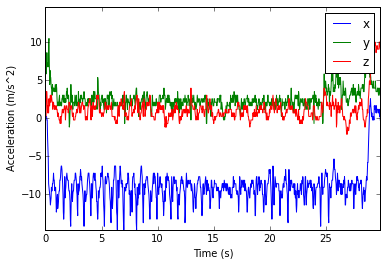

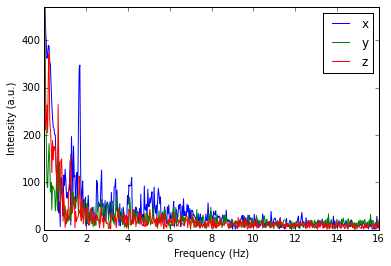

In [102]:
trial = raw['Walk'][1]['data']
#trial_data_fft = np.abs(np.fft.rfft(trial_data,axis=0))
plot_accel(trial)
plot_accel_fft(trial)

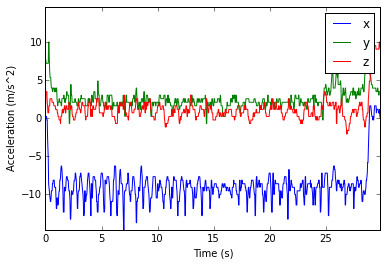

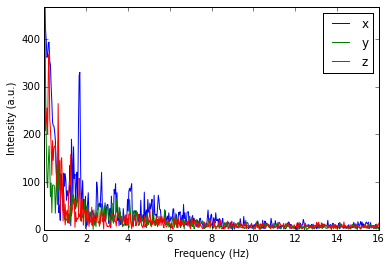

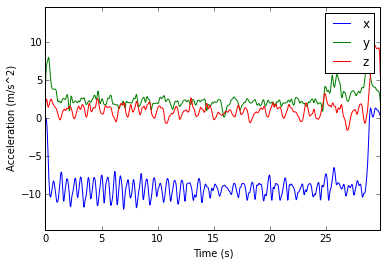

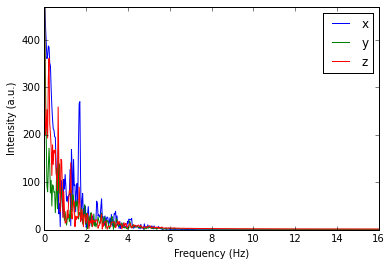

In [105]:
trial_med = med1d(trial)
trial_conv = conv1d(trial)
plot_accel(trial_med)
plot_accel_fft(trial_med)
plot_accel(trial_conv)
plot_accel_fft(trial_conv)